In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат

# 1. Загрузка изображения в оттенках серого

In [2]:
image = cv2.imread('sar_1_gray.jpg')

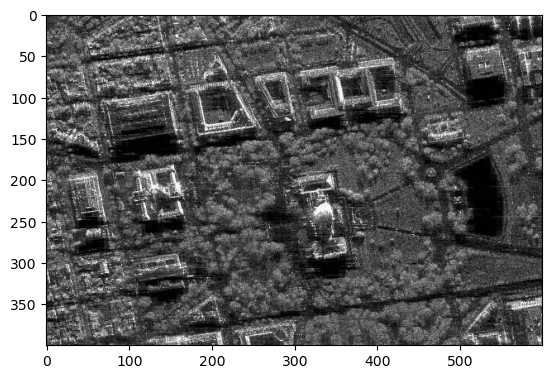

In [3]:
plt.imshow(image)

In [4]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

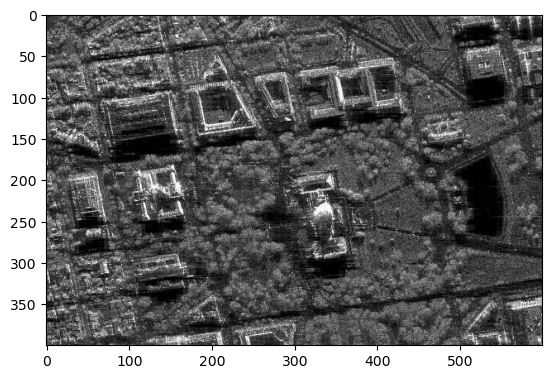

In [5]:
plt.imshow(image_gray, cmap='gray')

# 2. Построение гистограммы

In [6]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([image], [0], None, [histSize], histRange, accumulate=accumulate)

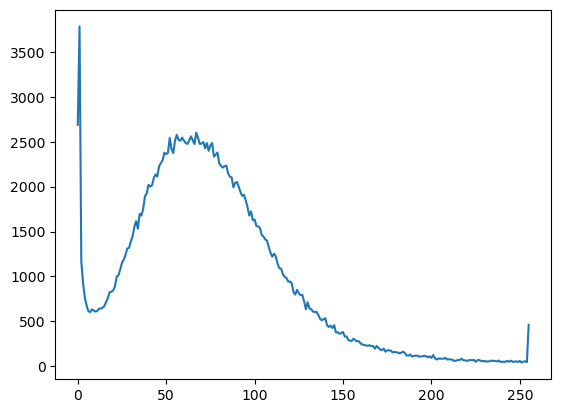

In [7]:
plt.plot(b_hist)

In [8]:
b_hist_cum = b_hist.cumsum()

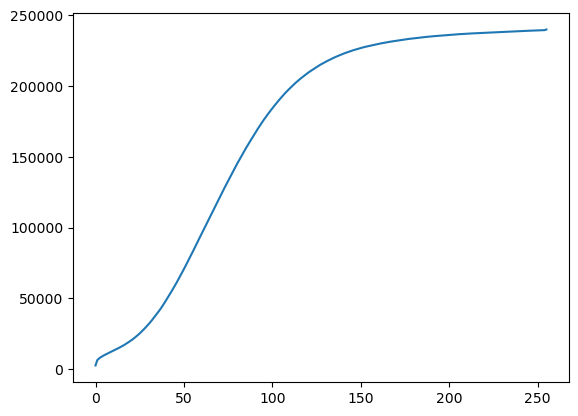

In [9]:
plt.plot(b_hist_cum)

# 3. Гамма-коррекция

In [10]:
def gamma_correction(img, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

In [11]:
gamma_05 = gamma_correction(image_gray, 0.5)

Text(0.5, 1.0, 'Gamma = 0.5')

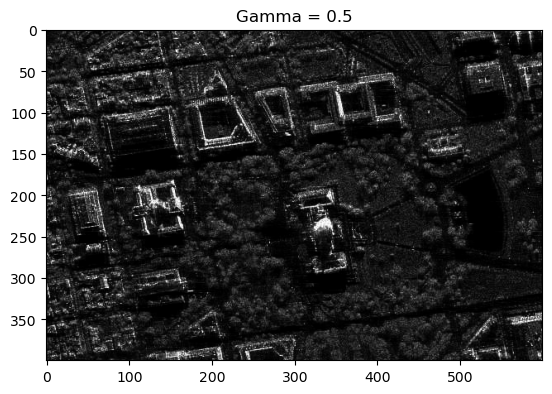

In [12]:
plt.imshow(gamma_05, cmap='gray')
plt.title('Gamma = 0.5')

In [13]:
gamma_15 = gamma_correction(image_gray, 1.5)

Text(0.5, 1.0, 'Gamma = 1.5')

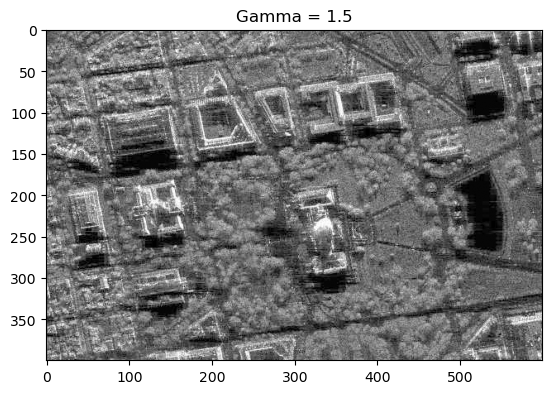

In [14]:
plt.imshow(gamma_15, cmap='gray')
plt.title('Gamma = 1.5')

In [15]:
gamma_20 = gamma_correction(image_gray, 2.0)

Text(0.5, 1.0, 'Gamma = 2.0')

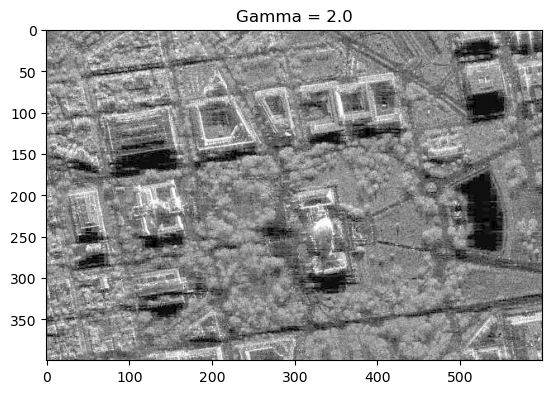

In [16]:
plt.imshow(gamma_20, cmap='gray')
plt.title('Gamma = 2.0')

Text(0.5, 1.0, 'Gamma = 2.0')

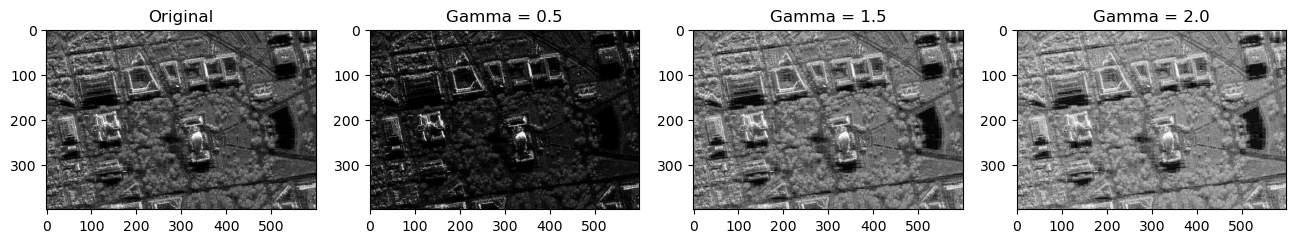

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(gamma_05, cmap='gray')
axes[1].set_title('Gamma = 0.5')
axes[2].imshow(gamma_15, cmap='gray')
axes[2].set_title('Gamma = 1.5')
axes[3].imshow(gamma_20, cmap='gray')
axes[3].set_title('Gamma = 2.0')

# 4. Сравнение: MSE и SSIM

In [18]:
mse_05 = mean_squared_error(image_gray, gamma_05)
ssim_05 = structural_similarity(image_gray, gamma_05)

In [19]:
print(f'Gamma = 0.5: MSE = {mse_05:.2f}, SSIM = {ssim_05:.4f}')

Gamma = 0.5: MSE = 2383.76, SSIM = 0.5270


In [20]:
mse_15 = mean_squared_error(image_gray, gamma_15)
ssim_15 = structural_similarity(image_gray, gamma_15)

In [21]:
print(f'Gamma = 1.5: MSE = {mse_15:.2f}, SSIM = {ssim_15:.4f}')

Gamma = 1.5: MSE = 1114.45, SSIM = 0.8940


In [22]:
mse_20 = mean_squared_error(image_gray, gamma_20)
ssim_20 = structural_similarity(image_gray, gamma_20)

In [23]:
print(f'Gamma = 2.0: MSE = {mse_20:.2f}, SSIM = {ssim_20:.4f}')

Gamma = 2.0: MSE = 3250.43, SSIM = 0.7875


In [24]:
gammas = [0.5, 1.5, 2.0]
mses = [mse_05, mse_15, mse_20]
ssims = [ssim_05, ssim_15, ssim_20]

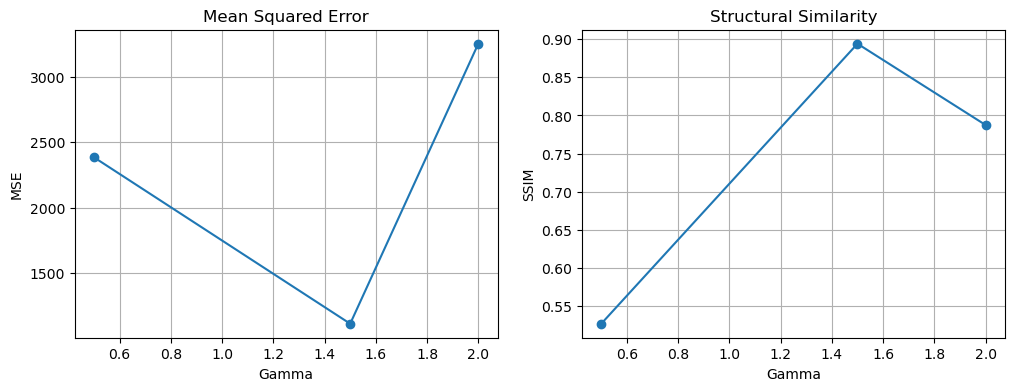

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(gammas, mses, 'o-')
ax1.set_xlabel('Gamma')
ax1.set_ylabel('MSE')
ax1.set_title('Mean Squared Error')
ax1.grid(True)

ax2.plot(gammas, ssims, 'o-')
ax2.set_xlabel('Gamma')
ax2.set_ylabel('SSIM')
ax2.set_title('Structural Similarity')
ax2.grid(True)

# 5. Статистическая цветокоррекция (эквализация)

In [26]:
eq_gray = cv2.equalizeHist(image_gray)

Text(0.5, 1.0, 'Histogram Equalization')

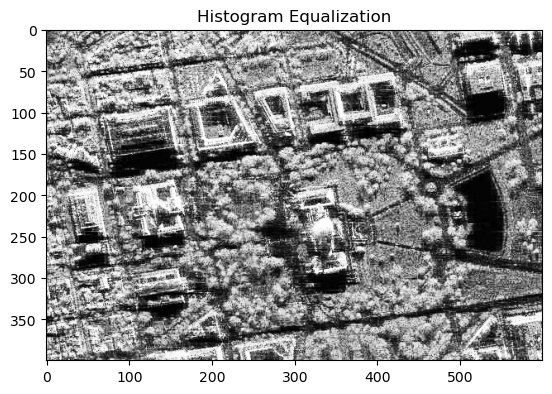

In [27]:
plt.imshow(eq_gray, cmap='gray')
plt.title('Histogram Equalization')

Text(0.5, 1.0, 'Equalized')

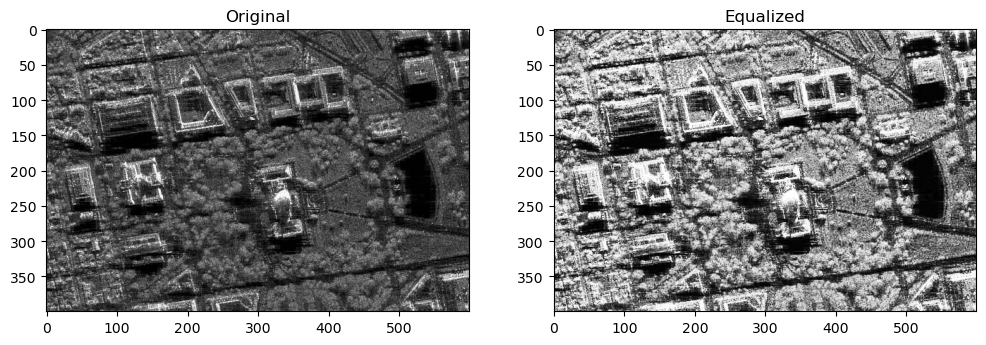

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.imshow(image_gray, cmap='gray')
ax1.set_title('Original')
ax2.imshow(eq_gray, cmap='gray')
ax2.set_title('Equalized')

In [29]:
hist_eq = cv2.calcHist([eq_gray], [0], None, [256], [0, 256])

Text(0.5, 1.0, 'Equalized Histogram')

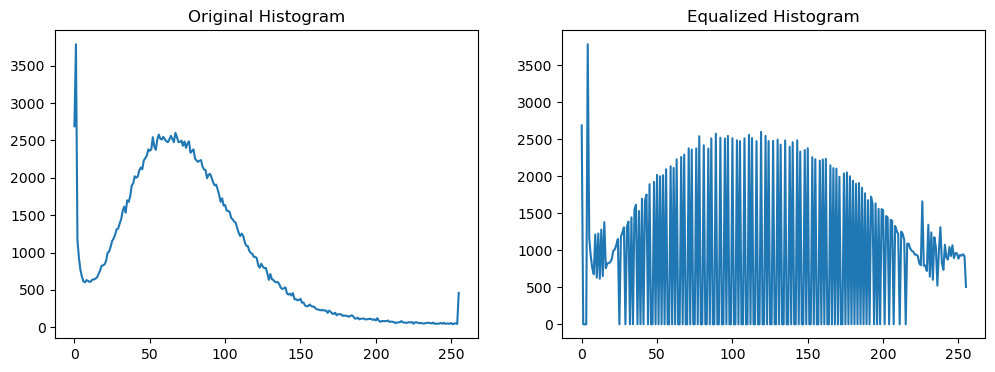

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(b_hist)
ax1.set_title('Original Histogram')
ax2.plot(hist_eq)
ax2.set_title('Equalized Histogram')

In [31]:
mse_eq = mean_squared_error(image_gray, eq_gray)
ssim_eq = structural_similarity(image_gray, eq_gray)

In [32]:
print(f'Equalization: MSE = {mse_eq:.2f}, SSIM = {ssim_eq:.4f}')

Equalization: MSE = 4021.80, SSIM = 0.6991


# 6. Пороговая фильтрация

In [33]:
ret, thresh_binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

Text(0.5, 1.0, 'Binary Threshold (127)')

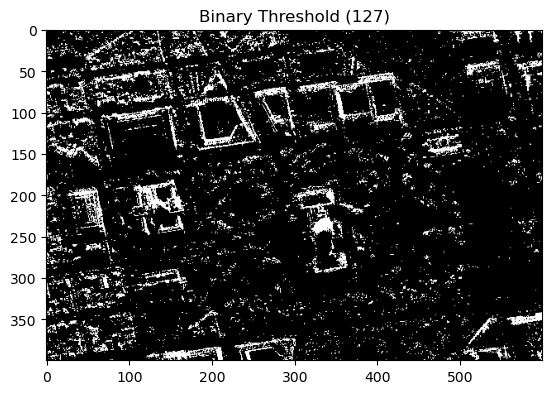

In [34]:
plt.imshow(thresh_binary, cmap='gray')
plt.title('Binary Threshold (127)')

In [35]:
ret, thresh_binary_inv = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY_INV)

Text(0.5, 1.0, 'Binary Inverse Threshold (127)')

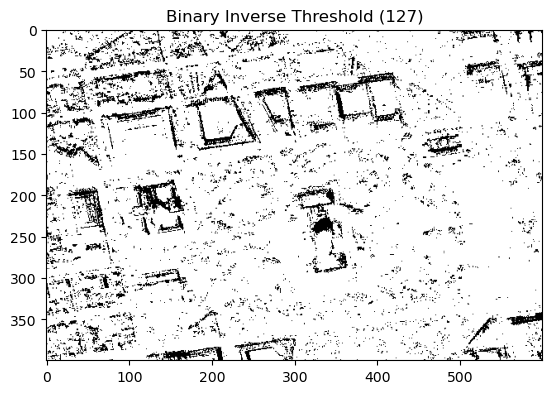

In [36]:
plt.imshow(thresh_binary_inv, cmap='gray')
plt.title('Binary Inverse Threshold (127)')

In [37]:
ret, thresh_trunc = cv2.threshold(image_gray, 127, 255, cv2.THRESH_TRUNC)

Text(0.5, 1.0, 'Truncate Threshold (127)')

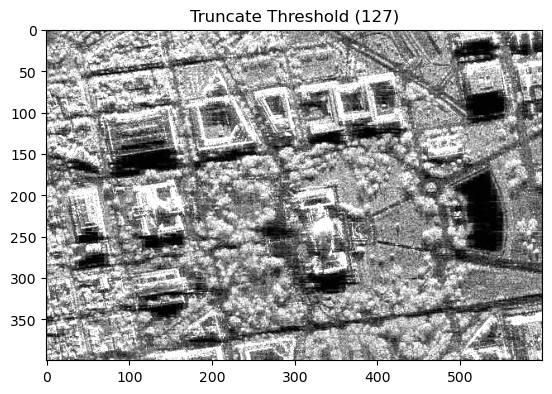

In [38]:
plt.imshow(thresh_trunc, cmap='gray')
plt.title('Truncate Threshold (127)')

In [39]:
ret, thresh_tozero = cv2.threshold(image_gray, 127, 255, cv2.THRESH_TOZERO)

Text(0.5, 1.0, 'To Zero Threshold (127)')

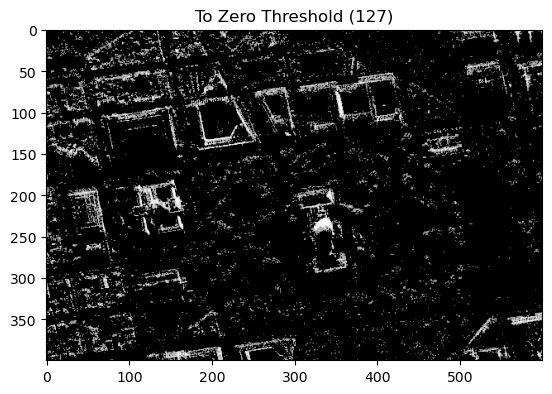

In [40]:
plt.imshow(thresh_tozero, cmap='gray')
plt.title('To Zero Threshold (127)')

In [41]:
ret_otsu, thresh_otsu = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [42]:
print(f'Otsu threshold value: {ret_otsu:.2f}')

Otsu threshold value: 85.00


Text(0.5, 1.0, 'Otsu Threshold (85)')

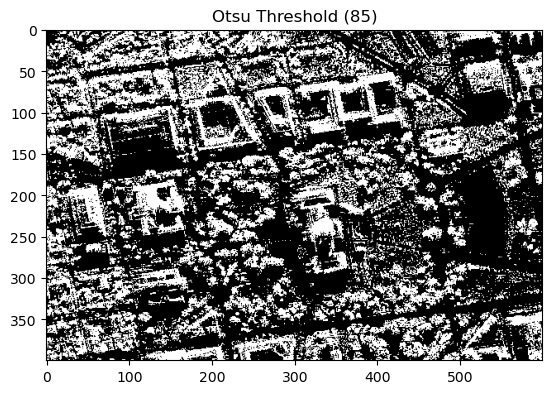

In [43]:
plt.imshow(thresh_otsu, cmap='gray')
plt.title(f'Otsu Threshold ({ret_otsu:.0f})')

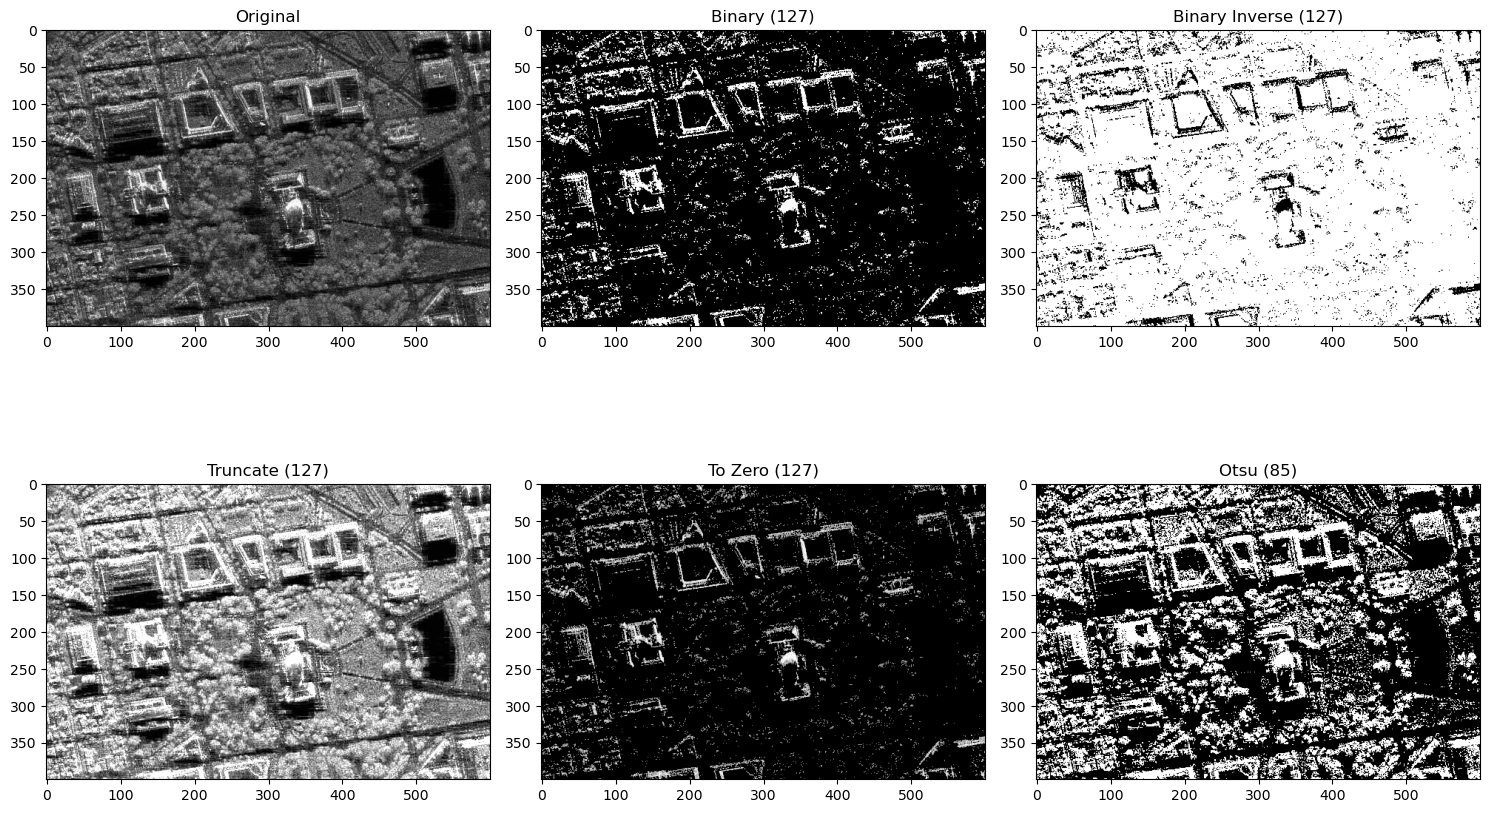

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 1].imshow(thresh_binary, cmap='gray')
axes[0, 1].set_title('Binary (127)')
axes[0, 2].imshow(thresh_binary_inv, cmap='gray')
axes[0, 2].set_title('Binary Inverse (127)')
axes[1, 0].imshow(thresh_trunc, cmap='gray')
axes[1, 0].set_title('Truncate (127)')
axes[1, 1].imshow(thresh_tozero, cmap='gray')
axes[1, 1].set_title('To Zero (127)')
axes[1, 2].imshow(thresh_otsu, cmap='gray')
axes[1, 2].set_title(f'Otsu ({ret_otsu:.0f})')
plt.tight_layout()

## Тестирование с разными порогами

In [45]:
thresholds = [64, 128, 192]

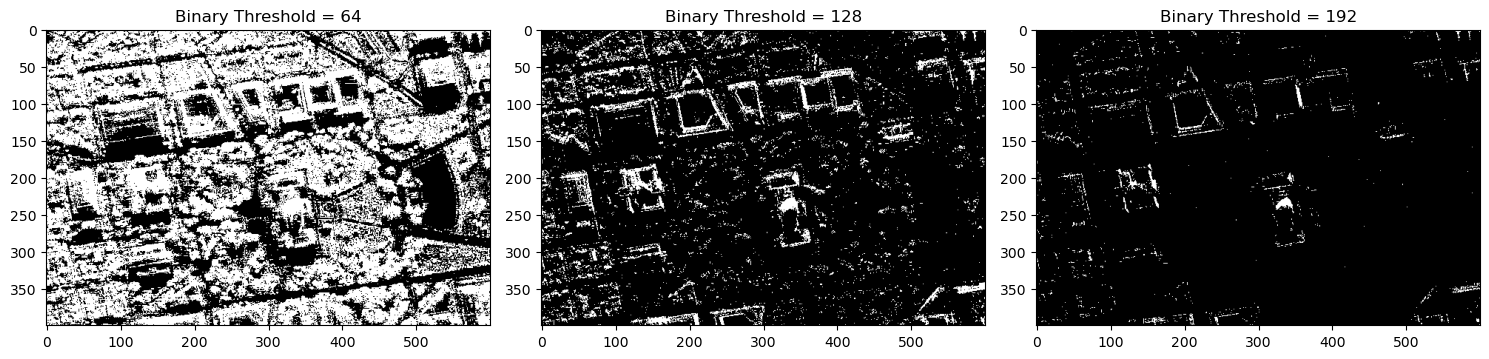

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, thresh_val in enumerate(thresholds):
    ret, thresh = cv2.threshold(image_gray, thresh_val, 255, cv2.THRESH_BINARY)
    axes[i].imshow(thresh, cmap='gray')
    axes[i].set_title(f'Binary Threshold = {thresh_val}')
plt.tight_layout()

## Результаты

In [47]:
print('Все задания выполнены!')
print(f'\nСтатистика:')
print(f'  Размер изображения: {image_gray.shape}')
print(f'  Оптимальный порог Оцу: {ret_otsu:.2f}')
print(f'\nГамма-коррекция:')
print(f'  γ=0.5: MSE={mse_05:.2f}, SSIM={ssim_05:.4f}')
print(f'  γ=1.5: MSE={mse_15:.2f}, SSIM={ssim_15:.4f}')
print(f'  γ=2.0: MSE={mse_20:.2f}, SSIM={ssim_20:.4f}')
print(f'\nЭквализация: MSE={mse_eq:.2f}, SSIM={ssim_eq:.4f}')

Все задания выполнены!

Статистика:
  Размер изображения: (400, 600)
  Оптимальный порог Оцу: 85.00

Гамма-коррекция:
  γ=0.5: MSE=2383.76, SSIM=0.5270
  γ=1.5: MSE=1114.45, SSIM=0.8940
  γ=2.0: MSE=3250.43, SSIM=0.7875

Эквализация: MSE=4021.80, SSIM=0.6991
